#NO


#DATA CLEANING

In [216]:
import pandas as pd

In [217]:
import pandas as pd
df1=pd.read_excel("/content/NO1Sep22-1Sep23.xlsx")
df1=df1.drop_duplicates()
# duplicates should be dropped

In [218]:
df1=df1.drop_duplicates()

In [219]:
df1.shape
df1

,dt,values
0,2022-09-01 00:00:00,4312.00
1,2022-09-01 01:00:00,4356.00
2,2022-09-01 02:00:00,4.56
3,2022-09-01 03:00:00,4464.00
4,2022-09-01 04:00:00,4572.00
...,...,...
8730,2023-08-31 19:00:00,2988.00
8731,2023-08-31 20:00:00,3568.00
8732,2023-08-31 21:00:00,4572.00
8733,2023-08-31 22:00:00,4.60


In [220]:
import pandas as pd
df2=pd.read_csv("/content/NO20_21.csv")
df2=df2.drop_duplicates()
# duplicates should be dropped

In [221]:
df2=df2.drop_duplicates()

In [222]:
df2.shape
df2

,Date;Value;Measurement
0,31-12-2020 01:00;2.984;KWH
1,31-12-2020 02:00;2.86;KWH
2,31-12-2020 03:00;4;KWH
3,31-12-2020 04:00;1.89;KWH
4,31-12-2020 05:00;3.552;KWH
...,...
8779,31-12-2021 20:00;1.914;KWH
8780,31-12-2021 21:00;3.018;KWH
8781,31-12-2021 22:00;1.946;KWH
8782,31-12-2021 23:00;3.434;KWH


In [223]:
df2[['Date', 'Value', 'Measurement']] = df2['Date;Value;Measurement'].str.split(';', expand=True)

# Splitting the 'Date' column into 'Date' and 'Time'
df2[['Date', 'Time']] = df2['Date'].str.split(' ', expand=True)

# Extracting year and month
df2['Year'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y').dt.year
df2['Month'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y').dt.month
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')
# Extract day
df2['Day'] = df2['Date'].dt.day
df2[['Hour','Minutes']] = df2['Time'].str.split(':', expand=True)
df2

,Date;Value;Measurement,Date,Value,Measurement,Time,Year,Month,Day,Hour,Minutes
0,31-12-2020 01:00;2.984;KWH,2020-12-31,2.984,KWH,01:00,2020,12,31,01,00
1,31-12-2020 02:00;2.86;KWH,2020-12-31,2.86,KWH,02:00,2020,12,31,02,00
2,31-12-2020 03:00;4;KWH,2020-12-31,4,KWH,03:00,2020,12,31,03,00
3,31-12-2020 04:00;1.89;KWH,2020-12-31,1.89,KWH,04:00,2020,12,31,04,00
4,31-12-2020 05:00;3.552;KWH,2020-12-31,3.552,KWH,05:00,2020,12,31,05,00
...,...,...,...,...,...,...,...,...,...,...
8779,31-12-2021 20:00;1.914;KWH,2021-12-31,1.914,KWH,20:00,2021,12,31,20,00
8780,31-12-2021 21:00;3.018;KWH,2021-12-31,3.018,KWH,21:00,2021,12,31,21,00
8781,31-12-2021 22:00;1.946;KWH,2021-12-31,1.946,KWH,22:00,2021,12,31,22,00
8782,31-12-2021 23:00;3.434;KWH,2021-12-31,3.434,KWH,23:00,2021,12,31,23,00


In [224]:
df2=df2.drop(columns="Date;Value;Measurement")
df2=df2.drop(columns="Minutes")
df2=df2.drop(columns="Time")
df2=df2.drop(columns="Date")

In [225]:
KWH_count=(df2['Measurement']=='KWH').sum()
KWH_count
df2=df2.drop(columns="Measurement")

In [226]:
df2['Value'] = pd.to_numeric(df2['Value'])
df2['Value'] *= 1000
df2

,Value,Year,Month,Day,Hour
0,2984.0,2020,12,31,01
1,2860.0,2020,12,31,02
2,4000.0,2020,12,31,03
3,1890.0,2020,12,31,04
4,3552.0,2020,12,31,05
...,...,...,...,...,...
8779,1914.0,2021,12,31,20
8780,3018.0,2021,12,31,21
8781,1946.0,2021,12,31,22
8782,3434.0,2021,12,31,23


ADDING THE BOTH DATAFRAME

In [227]:
#Splitting the column
df1['year'] = df1['dt'].dt.year
df1['month'] = df1['dt'].dt.month
df1['day'] = df1['dt'].dt.day
df1['time'] = df1['dt'].dt.time
df1['minutes']=df1['dt'].dt.minute
df1['seconds']=df1['dt'].dt.second
df1['hours']=df1['dt'].dt.hour
zeros_minute_count=(df1['minutes']==0).sum()
print(zeros_minute_count)
zeros_second_count=(df1['seconds']==0).sum()
print(zeros_second_count)
zeros_hour_count=(df1['hours']==0).sum()
print(zeros_hour_count)
df1

8735
8735
364


,dt,values,year,month,day,time,minutes,seconds,hours
0,2022-09-01 00:00:00,4312.00,2022,9,1,00:00:00,0,0,0
1,2022-09-01 01:00:00,4356.00,2022,9,1,01:00:00,0,0,1
2,2022-09-01 02:00:00,4.56,2022,9,1,02:00:00,0,0,2
3,2022-09-01 03:00:00,4464.00,2022,9,1,03:00:00,0,0,3
4,2022-09-01 04:00:00,4572.00,2022,9,1,04:00:00,0,0,4
...,...,...,...,...,...,...,...,...,...
8730,2023-08-31 19:00:00,2988.00,2023,8,31,19:00:00,0,0,19
8731,2023-08-31 20:00:00,3568.00,2023,8,31,20:00:00,0,0,20
8732,2023-08-31 21:00:00,4572.00,2023,8,31,21:00:00,0,0,21
8733,2023-08-31 22:00:00,4.60,2023,8,31,22:00:00,0,0,22


In [228]:
df1=df1.drop(columns="minutes")
df1=df1.drop(columns="seconds")
df1=df1.drop(columns="time")
df1=df1.drop(columns="dt")
df2=df2.rename(columns={'Value' :'values' })
df2=df2.rename(columns={'Year' :'year' })
df2=df2.rename(columns={'Month' :'month' })
df2=df2.rename(columns={'Day' :'day' })
df2=df2.rename(columns={'Hour' :'hours' })
df1

,values,year,month,day,hours
0,4312.00,2022,9,1,0
1,4356.00,2022,9,1,1
2,4.56,2022,9,1,2
3,4464.00,2022,9,1,3
4,4572.00,2022,9,1,4
...,...,...,...,...,...
8730,2988.00,2023,8,31,19
8731,3568.00,2023,8,31,20
8732,4572.00,2023,8,31,21
8733,4.60,2023,8,31,22


In [229]:
df2

,values,year,month,day,hours
0,2984.0,2020,12,31,01
1,2860.0,2020,12,31,02
2,4000.0,2020,12,31,03
3,1890.0,2020,12,31,04
4,3552.0,2020,12,31,05
...,...,...,...,...,...
8779,1914.0,2021,12,31,20
8780,3018.0,2021,12,31,21
8781,1946.0,2021,12,31,22
8782,3434.0,2021,12,31,23


In [238]:
df = pd.concat([df2, df1])
df

,values,year,month,day,hours
0,2984.0,2020,12,31,1
1,2860.0,2020,12,31,2
2,4000.0,2020,12,31,3
3,1890.0,2020,12,31,4
4,3552.0,2020,12,31,5
...,...,...,...,...,...
8730,2988.0,2023,8,31,19
8731,3568.0,2023,8,31,20
8732,4572.0,2023,8,31,21
8733,4.6,2023,8,31,22


# PER DAY ANALYSIS

In [239]:
Hourly_average_consumption = df.groupby(['year', 'month', 'day'])['values'].mean()
Hourly_average_consumption_df = Hourly_average_consumption.reset_index()
Hourly_average_consumption_df = Hourly_average_consumption_df.rename(columns={'values': 'Hourly_average_consumption'})
Hourly_average_consumption_df

,year,month,day,Hourly_average_consumption
0,2020,12,31,4032.608696
1,2021,1,1,4046.583333
2,2021,1,2,5696.500000
3,2021,1,3,5628.666667
4,2021,1,4,5346.666667
...,...,...,...,...
726,2023,8,27,3805.333333
727,2023,8,28,4211.500000
728,2023,8,29,4513.088333
729,2023,8,30,2925.250000


In [240]:
Hourly_maximum_consumption= df.groupby(['year','month','day'])['values'].max()
Hourly_maximum_consumption_df=Hourly_maximum_consumption.reset_index()
Hourly_maximum_consumption_df=Hourly_maximum_consumption_df.rename(columns={'values' :'Hourly_maximum_consumption' })
Hourly_maximum_consumption_df

,year,month,day,Hourly_maximum_consumption
0,2020,12,31,11122.0
1,2021,1,1,10758.0
2,2021,1,2,14860.0
3,2021,1,3,14856.0
4,2021,1,4,14010.0
...,...,...,...,...
726,2023,8,27,7712.0
727,2023,8,28,6488.0
728,2023,8,29,13172.0
729,2023,8,30,7068.0


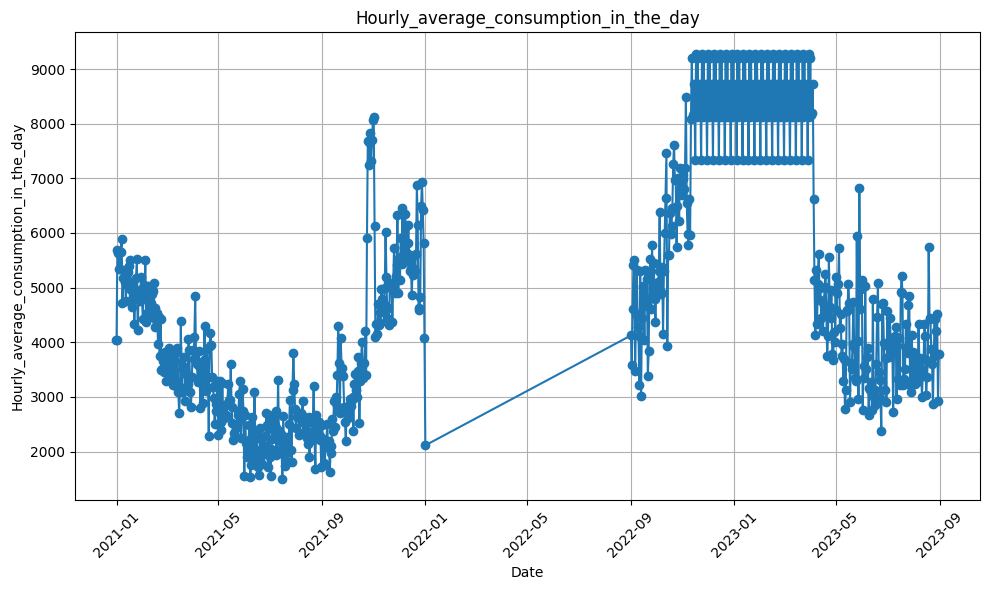

In [241]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Hourly_average_consumption_df['date'] = pd.to_datetime(Hourly_average_consumption_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Hourly_average_consumption_df['date'], Hourly_average_consumption_df['Hourly_average_consumption'], marker='o', linestyle='-')
plt.title('Hourly_average_consumption_in_the_day')
plt.xlabel('Date')
plt.ylabel('Hourly_average_consumption_in_the_day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

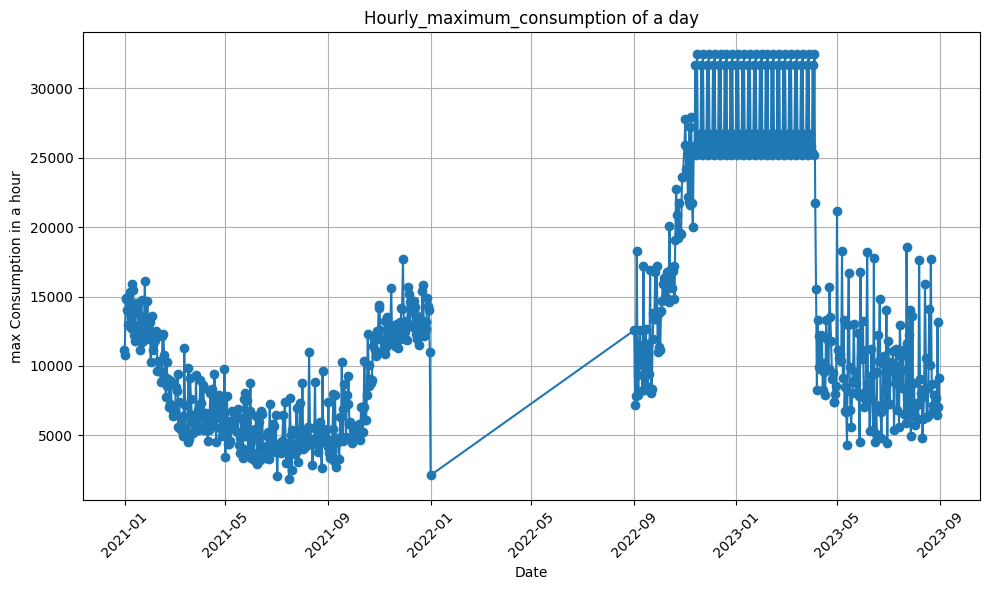

In [242]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Hourly_maximum_consumption_df['date'] = pd.to_datetime(Hourly_maximum_consumption_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Hourly_maximum_consumption_df['date'], Hourly_maximum_consumption_df['Hourly_maximum_consumption'], marker='o', linestyle='-')
plt.title('Hourly_maximum_consumption of a day')
plt.xlabel('Date')
plt.ylabel('max Consumption in a hour')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [243]:
daily_sum= df.groupby(['year','month','day'])['values'].sum()
daily_sum_df=daily_sum.reset_index()
daily_sum_df=daily_sum_df.rename(columns={'values' :'total of the day' })
daily_sum_df

,year,month,day,total of the day
0,2020,12,31,92750.00
1,2021,1,1,97118.00
2,2021,1,2,136716.00
3,2021,1,3,135088.00
4,2021,1,4,128320.00
...,...,...,...,...
726,2023,8,27,91328.00
727,2023,8,28,101076.00
728,2023,8,29,108314.12
729,2023,8,30,70206.00


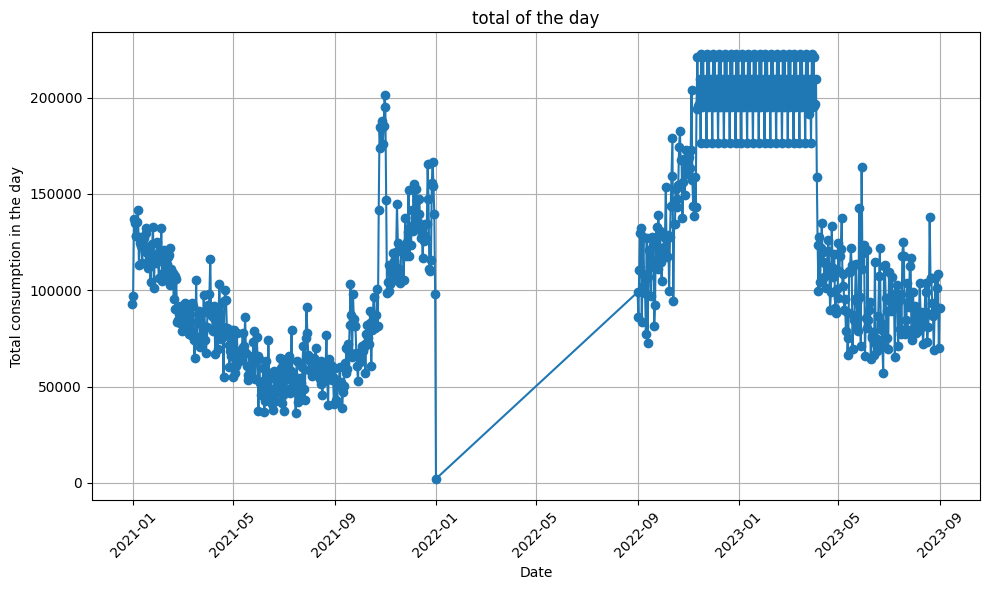

In [244]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
daily_sum_df['date'] = pd.to_datetime(daily_sum_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(daily_sum_df['date'], daily_sum_df['total of the day'], marker='o', linestyle='-')
plt.title('total of the day')
plt.xlabel('Date')
plt.ylabel('Total consumption in the day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#PER MONTH ANALYSIS

In [245]:
Daily_average_consumption = daily_sum_df.groupby(['year', 'month'])['total of the day'].mean()
Daily_average_consumption_df=Daily_average_consumption.reset_index()
Daily_average_consumption_df=Daily_average_consumption_df.rename(columns={'total of the day':'Daily_average_consumption'})
Daily_average_consumption_df

,year,month,Daily_average_consumption
0,2020,12,92750.000000
1,2021,1,121847.612903
2,2021,2,105900.214286
3,2021,3,82810.258065
4,2021,4,83109.400000
5,2021,5,66111.161290
6,2021,6,51555.266667
7,2021,7,56317.419355
8,2021,8,58280.064516
9,2021,9,64001.733333


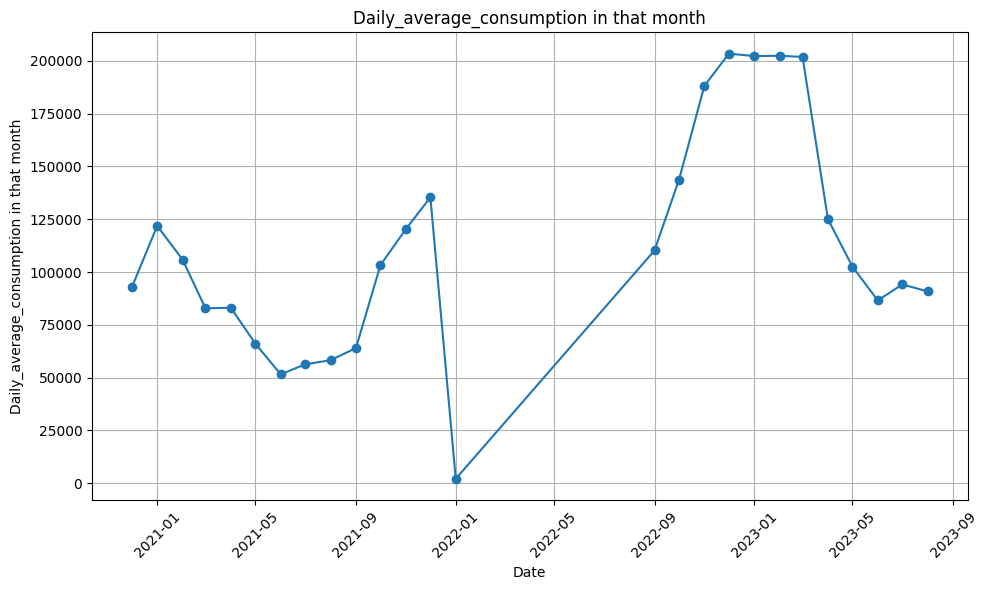

In [246]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Daily_average_consumption_df['date'] = pd.to_datetime({'year': Daily_average_consumption_df['year'], 'month': Daily_average_consumption_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Daily_average_consumption_df['date'], Daily_average_consumption_df['Daily_average_consumption'], marker='o', linestyle='-')
plt.title('Daily_average_consumption in that month')
plt.xlabel('Date')
plt.ylabel('Daily_average_consumption in that month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [247]:
monthly_total = daily_sum_df.groupby(['year', 'month'])['total of the day'].sum()
monthly_total_df=monthly_total.reset_index()
monthly_total_df=monthly_total_df.rename(columns={'total of the day':'monthly_total'})
monthly_total_df

,year,month,monthly_total
0,2020,12,92750.000
1,2021,1,3777276.000
2,2021,2,2965206.000
3,2021,3,2567118.000
4,2021,4,2493282.000
5,2021,5,2049446.000
6,2021,6,1546658.000
7,2021,7,1745840.000
8,2021,8,1806682.000
9,2021,9,1920052.000


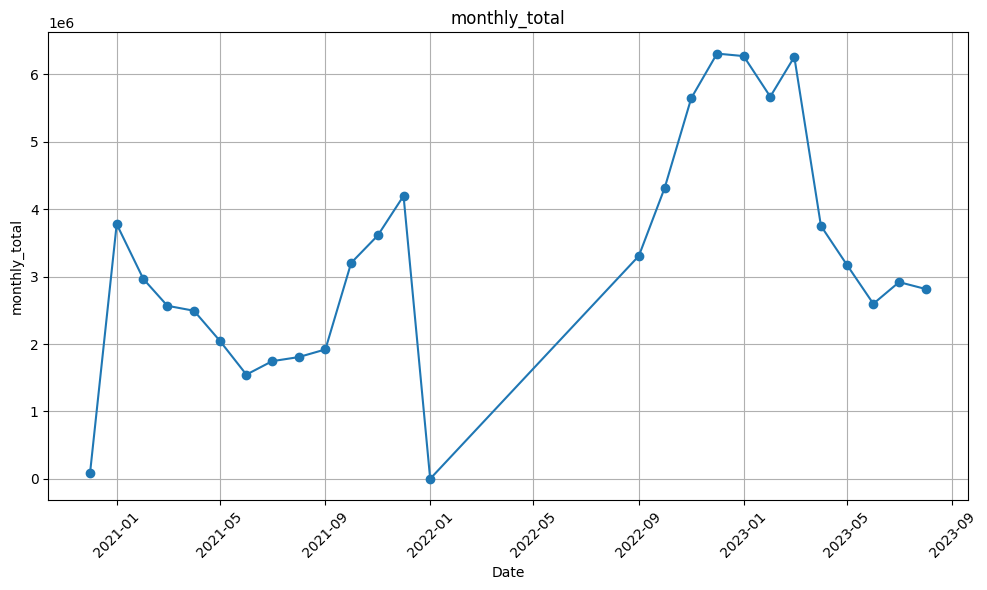

In [248]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
monthly_total_df['date'] = pd.to_datetime({'year': monthly_total_df['year'], 'month': monthly_total_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_df['date'], monthly_total_df['monthly_total'], marker='o', linestyle='-')
plt.title('monthly_total')
plt.xlabel('Date')
plt.ylabel('monthly_total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [249]:
Daily_maximum_consumption = daily_sum_df.groupby(['year', 'month'])['total of the day'].max()
Daily_maximum_consumption_df=Daily_maximum_consumption.reset_index()
Daily_maximum_consumption_df=Daily_maximum_consumption_df.rename(columns={'total of the day':'maximum in any day'})
Daily_maximum_consumption_df

,year,month,maximum in any day
0,2020,12,92750.00
1,2021,1,141550.00
2,2021,2,132218.00
3,2021,3,105410.00
4,2021,4,116124.00
5,2021,5,86284.00
6,2021,6,74004.00
7,2021,7,91496.00
8,2021,8,76872.00
9,2021,9,103118.00


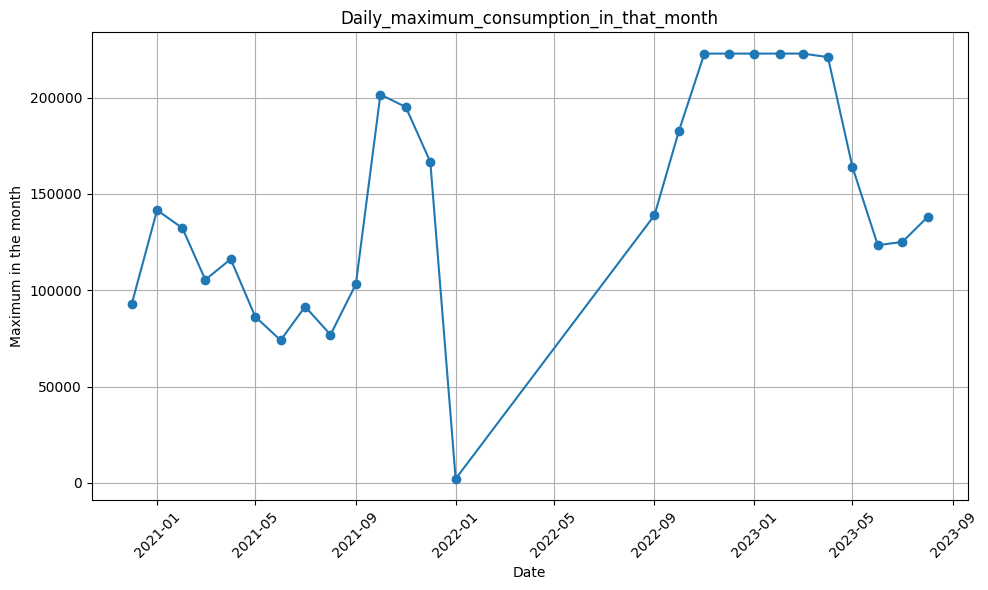

In [250]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Daily_maximum_consumption_df['date'] = pd.to_datetime({'year': Daily_maximum_consumption_df['year'], 'month': Daily_maximum_consumption_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Daily_maximum_consumption_df['date'], Daily_maximum_consumption_df['maximum in any day'], marker='o', linestyle='-')
plt.title('Daily_maximum_consumption_in_that_month')
plt.xlabel('Date')
plt.ylabel('Maximum in the month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yearly anaysis

In [251]:
Monthly_average_consumption = monthly_total_df.groupby(['year'])['monthly_total'].mean()

In [252]:
Monthly_average_consumption

year
2020      92750.000
2021    2656655.000
2022    3914291.156
2023    4181477.798
Name: monthly_total, dtype: float64

In [253]:
mean_daily_consumption = daily_sum_df['total of the day'].mean()
print(mean_daily_consumption)

116273.44482079343


In [254]:
mean_monthly_consumption=monthly_total_df['monthly_total'].mean()
print(mean_monthly_consumption)

3269072.6216923073
